In [1]:
### 1. Importing Libraries and Data preprocessing
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# set seed
seed = 42

# load csv file
data = pd.read_csv('data/Dataset/emergency_classification.csv')

print(data.head())

  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1


In [9]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('data/Dataset/images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)
    


In [10]:
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)


X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


In [11]:
## Image Augmentation using Keras (ImageDataGenerator)
from keras.preprocessing.image import ImageDataGenerator
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, 
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")


image_augmentation.fit(X_train)

 ### 2. Model Building
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)


2024-02-04 18:24:17.789540: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-04 18:24:17.789628: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-04 18:24:17.789647: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-04 18:24:17.789703: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 18:24:17.789730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])



/var/folders/c7/xx2r_j1j5jnchz6414lhvm3h0000gn/T/ipykernel_33239/2610531924.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)


Epoch 1/50


2024-02-04 18:25:24.035217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-04 18:25:24.172301: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 29s 2s/step - loss: 1.0145 - accuracy: 0.5352 - val_loss: 0.7143 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 25s 2s/step - loss: 0.9065 - accuracy: 0.5529 - val_loss: 0.7048 - val_accuracy: 0.4391
Epoch 3/50
13/13 [==============================] - 26s 2s/step - loss: 0.8638 - accuracy: 0.5450 - val_loss: 0.7042 - val_accuracy: 0.4391
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.8355 - accuracy: 0.5729 - val_loss: 0.6980 - val_accuracy: 0.4391
Epoch 5/50
13/13 [==============================] - 17s 1s/step - loss: 0.7961 - accuracy: 0.5893 - val_loss: 0.6936 - val_accuracy: 0.4561
Epoch 6/50
13/13 [==============================] - 18s 1s/step - loss: 0.8289 - accuracy: 0.5656 - val_loss: 0.6896 - val_accuracy: 0.4943
Epoch 7/50
13/13 [==============================] - 19s 2s/step - loss: 0.8225 - accuracy: 0.5711 - val_loss: 0.6942 - val_accuracy: 0.4646
Epoch 8/50
13/13 [=============

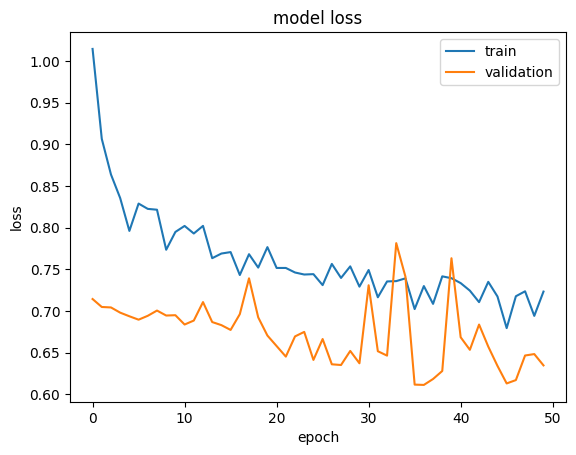

In [14]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


from sklearn.metrics import accuracy_score

# For binary classification, we assume the output layer uses a sigmoid activation function
# Predicting probabilities for the training set
train_predictions = model.predict(X_train)
# Convert probabilities to binary class labels using a threshold of 0.5
train_predictions_labels = (train_predictions > 0.5).astype(int)

# Calculating training accuracy
training_accuracy = accuracy_score(y_train, train_predictions_labels)
print('Training Accuracy: ', training_accuracy)

# Predicting probabilities for the validation set
valid_predictions = model.predict(X_valid)
# Convert probabilities to binary class labels using a threshold of 0.5
valid_predictions_labels = (valid_predictions > 0.5).astype(int)

# Calculating validation accuracy
validation_accuracy = accuracy_score(y_valid, valid_predictions_labels)
print('\nValidation Accuracy: ', validation_accuracy)

